# Unit 4 lab: Multiprocessing in Python
In this exercise, we are exploring the multiprocessing capabilities of Python to support the concepts of Processes, Process Lifecycle and Concurrent Execution.



First let's import what we need from the multiprocessing library, and *time*, for timing code.

In [1]:
from multiprocessing import Pool
import time

The multiprocessing package supports the spawning of separate processes running your Python code. In the following code, we create the given number of processes. Note that these are operating system level processes with their own threads of control and address spaces.

Let's investigate how processes are mapped to cores. For this, we're going to create a worker function that executes a lot of instructions (CPU-Bound), and we're going to time how long it takes. 

This worker function must be placed in an auxiliary file, here *defs.py*. Take a look at this file, and then import it by running the cell below.

In [2]:
import defs

In defs, there is a function called *work_that_CPU*, which will generate some random numbers (to the amount specified by the input *num_loops*), and print the time taken to do this, as well as the name of the process that is executing it.  

Next we write a function that will run *work_that_CPU* a number of times (as specified by the input *num_processes*), with each run being given to a different process.

In [3]:
def core_investigation(num_processes,num_loops):
    
    inputs=[num_loops]*num_processes
    pool_of_processes = Pool(processes=num_processes)# Create processes to the amount specified by num_processes
    pool_of_processes.map(defs.work_that_CPU,inputs) # Assign a run of work_that_CPU to each process, with num_loops as the input
        
    pool_of_processes.close()  # It is good practice for sake of efficiency to kill the processes once you're done with them.

Each of our processes will be mapped to a physical core. Starting from 1 process, the time taken for each process should remain roughly constant until we exceed the available number of cores (which could range from 4 to 16 depending on your machine).

To see this, play around with the number of processes (*num_processes*) and the amount of computation in each process (*num_loops*) below. Settle on a value for *num_loops* so that the execution of this for a single process takes around 1s to complete.

In [4]:
num_loops=10000000
num_processes=1
core_investigation(num_processes,num_loops)

<SpawnProcess name='SpawnPoolWorker-1' parent=10055 started daemon>  took  0.5736942291259766  seconds


If each process is mapped to a different core, then the time taken should remain roughly constant. If not, then execution time should increase. 

Now run this for all values of *num_processes* from 1 up to 20, and compute for each run the total amount of time taken to run all the processes. Plot a graph of number of processes executing *work_that_CPU* against total time taken.

Note: it doesn't look nice to have the printouts of all the times taken for every process here, so comment out the print line in *work_that_CPU* in *defs.py*. To keep track of progress just print every value of *num_processes* as you get to it.

In [5]:
times=[]

for p in range(1,21):
    starttime=time.time()
    
    core_investigation(p,num_loops)
    
    endtime=time.time()
    timetaken=endtime-starttime
    
    times.append(timetaken)
    print(p)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


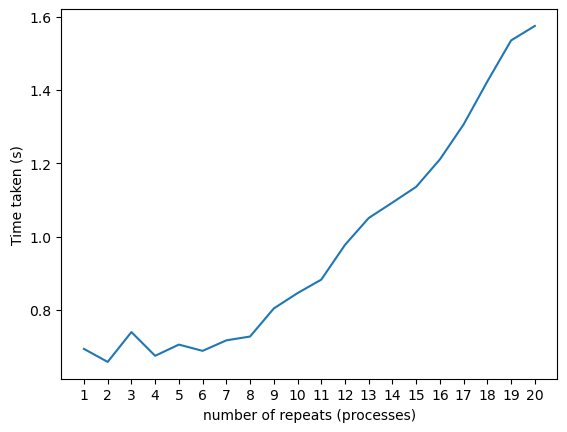

In [6]:
import matplotlib.pyplot as plt
c=[]
for p in range(1,21):
    c.append(p)

plt.plot(c,times)
plt.xlabel("number of repeats (processes)")
plt.ylabel("Time taken (s)")
plt.xticks(c)
plt.show()

I have 8 performance cores and 4 efficiency cores on my laptop. The former are available to Python. The latter take care of a load of background stuff that's running most of the time. See how the time is roughly constant as I increase the number of repeats up to 8, and then it increases in a non-straightforward way. Parallel processing is somewhat complex and it's not always predictable how processes get mapped to cores and how they all get scheduled. 

Write a modified version of the *core_investigation* function that now contains separate inputs for the number of times *work_that_CPU* will be run and the number of processes that will run concurrently. 

In [7]:
import math

def core_investigation2(num_repeats, num_processes,num_loops):
    
    a=math.floor(num_repeats/num_processes)
    
    for i in range(a):
    
        inputs=[num_loops]*num_processes
        pool_of_processes = Pool(processes=num_processes)# Create processes to the amount specified by num_processes
        pool_of_processes.map(defs.work_that_CPU,inputs) # Assign a run of work_that_CPU to each process, with num_loops as the input
        
        pool_of_processes.close()  # It is good practice for sake of efficiency to kill the processes once you're done with them.
    
    inputs=[num_loops]*(num_repeats-a*num_processes)
    pool_of_processes = Pool(processes=num_processes)# Create processes to the amount specified by num_processes
    pool_of_processes.map(defs.work_that_CPU,inputs) # Assign a run of work_that_CPU to each process, with num_loops as the input
    pool_of_processes.close()  # It is good practice for sake of efficiency to kill the processes once you're done with them.

Now, keeping fixed at 20 the number of times that you're running *work_that_CPU*, vary the number of concurrent processes that will do this job, from 1 up to 20. Compute the run-times and plot them. That is, plot number of concurrently running processes against time taken.

In [8]:
times=[]

for p in range(1,21):
    starttime=time.time()
    
    core_investigation2(20,p,10000000)
    
    endtime=time.time()
    timetaken=endtime-starttime
    
    times.append(timetaken)
    print(p)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


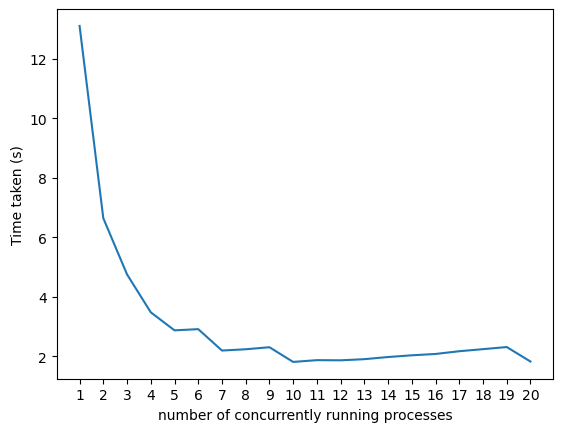

In [9]:
c=[]
for p in range(1,21):
    c.append(p)

plt.plot(c,times)
plt.xlabel("number of concurrently running processes")
plt.ylabel("Time taken (s)")
plt.xticks(c)
plt.show()

Time taken plateaus when the number of concurrently running processes equals the number of cores I have available.

**Extension.** Let's try a function that is relatively quick to run, and is returning an output. 

In [10]:
import defs2

In [11]:
def core_investigation3(num_repeats, num_processes,num_loops):
    
    a=math.floor(num_repeats/num_processes)
    
    for i in range(a):
    
        inputs=[num_loops]*num_processes
        pool_of_processes = Pool(processes=num_processes)# Create processes to the amount specified by num_processes
        xs=pool_of_processes.map(defs2.myfunc,inputs) # Assign a run of work_that_CPU to each process, with num_loops as the input
        
        pool_of_processes.close()  # It is good practice for sake of efficiency to kill the processes once you're done with them.
    
    inputs=[num_loops]*(num_repeats-a*num_processes)
    pool_of_processes = Pool(processes=num_processes)# Create processes to the amount specified by num_processes
    pool_of_processes.map(defs.work_that_CPU,inputs) # Assign a run of work_that_CPU to each process, with num_loops as the input
    pool_of_processes.close()  # It is good practice for sake of efficiency to kill the processes once you're done with them.

In [12]:
times=[]

for p in range(1,21):
    starttime=time.time()
    
    core_investigation3(20,p,10000000)
    
    endtime=time.time()
    timetaken=endtime-starttime
    
    times.append(timetaken)
    print(p)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


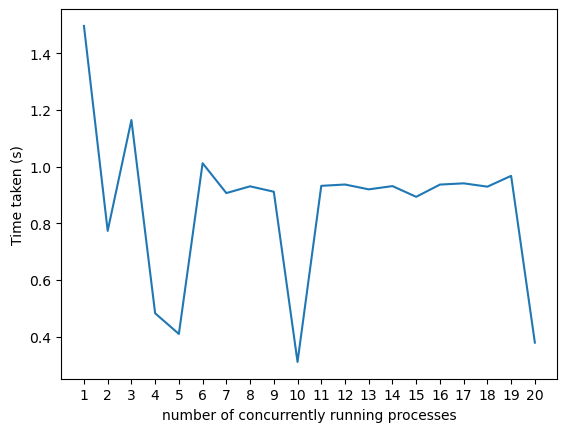

In [13]:
import matplotlib.pyplot as plt
c=[]
for p in range(1,21):
    c.append(p)

plt.plot(c,times)
plt.xlabel("number of concurrently running processes")
plt.ylabel("Time taken (s)")
plt.xticks(c)
plt.show()

In this case some speed up happens but the graph is quite complicated. Passing data from one core to another, and setting up multiple processes takes time. Doing lots or parallelisation of functions that don't take very long to run doesn't always result in much speed up, and can even slow things down.